In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import SGD, Adam
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
'定義子資料夾名稱&對應的數字，檔名不能有中文'
class_names = ['alligator','alpaca','antelope','badger','bat','bear','bee','beetle','bison','boar','Brown-Headed Barbet','Buffalo','butterfly','cat','caterpillar','Cattle Egret','chicken','chimpanzee','cockroach','Common Kingfisher','Common Myna','Common Rosefinch','Common Tailorbird','Coppersmith Barbet','cow','coyote','crab','crocodile','crow','deer','dog','dolphin','donkey','dragonfly','duck','eagle','elephant','flamingo','fly','Forest Wagtail','fox','gharial','goat','goldfish','goose','gorilla','grasshopper','Gray Wagtail','Green Bee-Eater','hamster','hare','hedgehog','hippopotamus','Hoopoe','hornbill','horse','House Crow','hummingbird','hyena','Indian Grey Hornbill','Indian Pitta','Indian Roller','jellyfish','Jungle Babbler','kangaroo','koala','ladybugs','leopard','lion','lizard','lobster','mosquito','moth','mouse','Northern Lapwing','octopus','okapi','orangutan','otter','owl','ox','panda','pangolin','parrot','Peacock','pelecaniformes','penguin','pig','pigeon','porcupine','possum','Python','raccoon','Red-Wattled Lapwing','reindeer','Rhino','Ruddy Shelduck','Rufous Treepie','Russell\'s Viper','sandpiper','Sarus Crane','seahorse','seal','shark','sheep','sparrow','spider','squid','squirrel','starfish','swan','tiger','turkey','turtle','whale','White Wagtail','White-Breasted Kingfisher','White-Breasted Waterhen','wolf','wombat','woodpecker','zebra']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (64, 64)

In [3]:
def load_data():
    datasets = ['training_set', 'test_set']#資料夾
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                try:
                    # Get the path name of the image
                    img_path = os.path.join(os.path.join(dataset, folder), file)

                    # Open and resize the img
                    image = cv2.imread(img_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    #cv讀照片，顏色莫認為BGR，需轉為RGB，錯誤表示黑白或已轉
                    image = cv2.resize(image, IMAGE_SIZE) 

                    # Append the image and its corresponding label to the output
                    images.append(image)
                    labels.append(label)
                except:
                    print(img_path)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading training_set


100%|█████████████████████████████████████████████████████████████████████████████| 1074/1074 [00:01<00:00, 765.65it/s]


Loading test_set


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 97.37it/s]


In [5]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [6]:
'隨機性'
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
'標準化'
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [7]:
'建模'
input_shape = (64, 64, 3)

model = Sequential([
    Conv2D(128, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.1),
    Conv2D(128, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.1),
    Conv2D(256, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.1),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.1),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.1),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Flatten(),
    Dropout(0.4),
    Dense(50, activation='softmax') #輸出層，分類用softmax
])
model.compile(optimizer = 'adam', #SGD(lr=0.1)
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, 
                    #validation_data=(test_images, test_labels),
                    #verbose=2,callbacks=[earlyStop],
                    batch_size=128, epochs=400)

Epoch 1/400
504/504 [==============================] - 15s 18ms/step - loss: 3.8250 - accuracy: 0.1057
Epoch 2/400
504/504 [==============================] - 9s 17ms/step - loss: 3.1906 - accuracy: 0.2149
Epoch 3/400
504/504 [==============================] - 9s 17ms/step - loss: 2.7871 - accuracy: 0.3127
Epoch 4/400
504/504 [==============================] - 9s 17ms/step - loss: 2.5465 - accuracy: 0.3645
Epoch 5/400
504/504 [==============================] - 9s 17ms/step - loss: 2.3418 - accuracy: 0.4110
Epoch 6/400
504/504 [==============================] - 9s 17ms/step - loss: 2.2022 - accuracy: 0.4435
Epoch 7/400
504/504 [==============================] - 9s 17ms/step - loss: 2.0555 - accuracy: 0.4757
Epoch 8/400
504/504 [==============================] - 9s 17ms/step - loss: 1.9640 - accuracy: 0.4992
Epoch 9/400
504/504 [==============================] - 9s 17ms/step - loss: 1.9135 - accuracy: 0.5113
Epoch 10/400
504/504 [==============================] - 9s 17ms/step - loss: 1.80

504/504 [==============================] - 9s 17ms/step - loss: 0.6478 - accuracy: 0.8338
Epoch 160/400
504/504 [==============================] - 9s 17ms/step - loss: 0.6287 - accuracy: 0.8389
Epoch 161/400
504/504 [==============================] - 9s 17ms/step - loss: 0.6155 - accuracy: 0.8416
Epoch 162/400
504/504 [==============================] - 9s 17ms/step - loss: 0.6439 - accuracy: 0.8368
Epoch 163/400
504/504 [==============================] - 9s 17ms/step - loss: 0.6300 - accuracy: 0.8385
Epoch 164/400
504/504 [==============================] - 9s 17ms/step - loss: 0.6367 - accuracy: 0.8373
Epoch 165/400
504/504 [==============================] - 9s 17ms/step - loss: 0.6518 - accuracy: 0.8348
Epoch 166/400
504/504 [==============================] - 9s 17ms/step - loss: 0.6433 - accuracy: 0.8368
Epoch 167/400
504/504 [==============================] - 9s 17ms/step - loss: 0.7088 - accuracy: 0.8205
Epoch 168/400
504/504 [==============================] - 9s 17ms/step - loss: 

504/504 [==============================] - 9s 17ms/step - loss: 0.5496 - accuracy: 0.8704
Epoch 316/400
504/504 [==============================] - 9s 17ms/step - loss: 0.5441 - accuracy: 0.8693
Epoch 317/400
504/504 [==============================] - 9s 17ms/step - loss: 0.5633 - accuracy: 0.8660
Epoch 318/400
504/504 [==============================] - 9s 17ms/step - loss: 0.8046 - accuracy: 0.8185
Epoch 319/400
504/504 [==============================] - 9s 17ms/step - loss: 0.5927 - accuracy: 0.8593
Epoch 320/400
504/504 [==============================] - 9s 17ms/step - loss: 0.5346 - accuracy: 0.8731
Epoch 321/400
504/504 [==============================] - 9s 17ms/step - loss: 0.5353 - accuracy: 0.8728
Epoch 322/400
504/504 [==============================] - 9s 17ms/step - loss: 0.9752 - accuracy: 0.7797
Epoch 323/400
504/504 [==============================] - 9s 17ms/step - loss: 0.5797 - accuracy: 0.8600
Epoch 324/400
504/504 [==============================] - 9s 17ms/step - loss: 

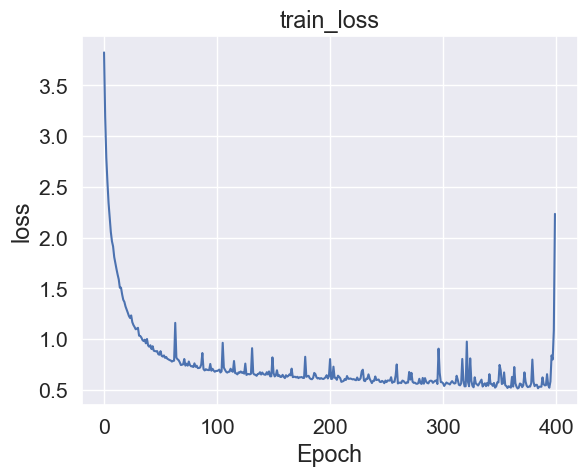

In [9]:
'模型概況'
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(history.history["loss"])
#scores = model.evaluate(test_images, test_labels)  
#print('test:',result[1])

In [10]:
'預測'
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

22/22 [==============================] - 1s 5ms/step


In [11]:
'混淆矩陣'
CM = confusion_matrix(test_labels, pred_labels)
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 
print(accuracy(CM))

0.4503597122302158


In [ ]:
'混淆矩陣視覺化，看錯誤'
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [12]:
'存模型&讀模型'
from keras.models import load_model
model.save("31702-02_model")

INFO:tensorflow:Assets written to: 31702-02_model\assets


INFO:tensorflow:Assets written to: 31702-02_model\assets
